# Дифференцирование и интегрирование функций

In [1]:
from matplotlib import pyplot as plt


def configure_matplotlib():
    plt.rc('text', usetex=True)
    plt.rcParams["axes.titlesize"] = 28
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 24
    plt.rcParams["xtick.labelsize"] = plt.rcParams["ytick.labelsize"] = 18
    plt.rcParams["text.latex.preamble"] = r"""
    \usepackage[utf8]{inputenc}
    \usepackage[english,russian]{babel}
    \usepackage{amsmath}
    """

configure_matplotlib()

## Дифференцирование функций 

Числено взять производную от любой функции можно методом [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy.misc.derivative). 

Продемонстрируем его применение на примере функции $f(x) = x^2$, первая производная которой $f'(x)=2x$, а вторая $f''(x) = 2$. 

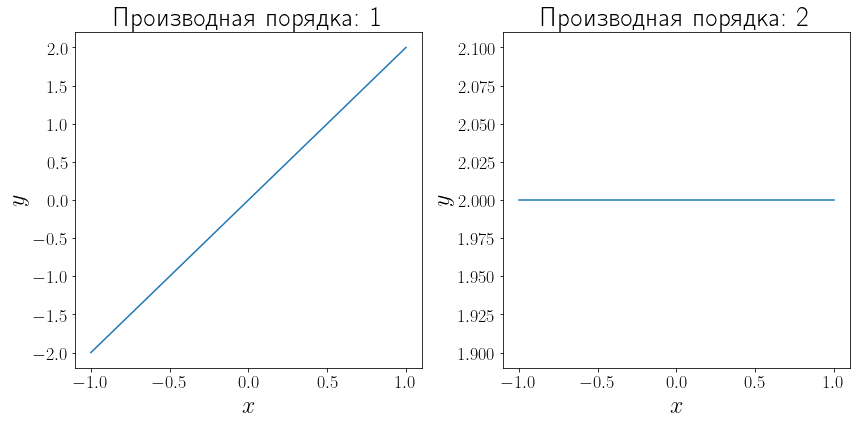

In [17]:
from scipy.misc import derivative
import numpy as np

def f(x):
    return x ** 2

x = np.linspace(-1, 1, 100)

fig, axs = plt.subplots(figsize=(12, 6), ncols=2, layout="tight")
for i, ax in enumerate(axs.flatten()):
    order = i + 1
    ax.plot(x, derivative(f, x, n=order))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title(f"Производная порядка: {order}")
    



## Интегрирование функций

Подмодуль [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) позволяет приближенно вычислять значение определенных интегралов.

### Однократные интегралы
Функция [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) позволяет проинтегрировать функцию $f\colon \mathbb{R} \to \mathbb{R}$. Вызов функции `quad(f, a, b)` приближенно находит значение интеграла

$$
\int\limits_a^b f(x) \, dx.
$$

В качестве примера найдем численно значение интеграла 

$$
I = \int\limits_0^\pi \sin x \, dx = -\cos x\Big|_0^\pi = 2.
$$

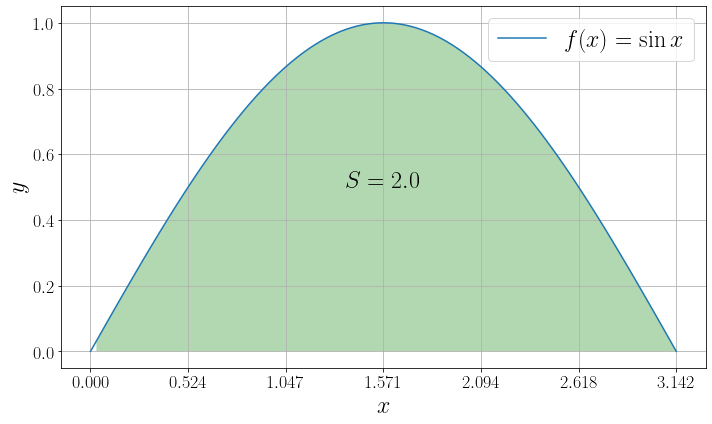

In [2]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt


f = np.sin
a, b = 0, np.pi
I, _ = integrate.quad(f, 0, np.pi)
x = np.linspace(0, np.pi, 100)
y = f(x)


fig, ax = plt.subplots(figsize=(10, 6), layout="tight")
ax.plot(x, y, label=r"$f(x)=\sin x$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.fill_between(x, np.zeros_like(x), y, where=(y>0), facecolor='green', alpha=0.30)
ax.set_xticks(np.linspace(0, np.pi, 7))
ax.text(np.pi/2, 0.5, fr"$S = {I}$", fontdict={"size": 24, "ha": "center"})
ax.legend()
ax.grid()


Параметры $a$ и $b$ могут принимать значения `-inf` и `+inf`, чтобы брать несобственные интегралы. Продемонстрируем это на примере интеграла

$$
I = \int\limits_1^\infty \dfrac{1}{x^2}\,dx = 1.
$$

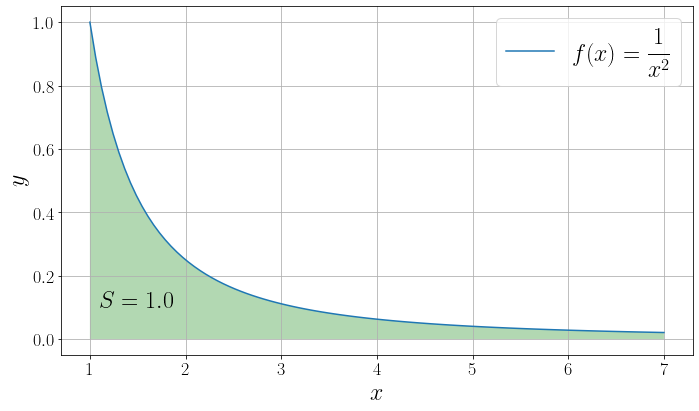

In [39]:
def f(x):
    return 1. / np.square(x)


a, b = 1, np.inf
I, _ = integrate.quad(f, a, b)

x = np.linspace(a, 7, 100)
y = f(x)


fig, ax = plt.subplots(figsize=(10, 6), layout="tight")
ax.plot(x, y, label=r"$f(x)=\dfrac{1}{x^2}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.fill_between(x, np.zeros_like(x), y, where=(y>0), facecolor='green', alpha=0.30)
ax.set_xticks(np.linspace(1, 7, 7))
ax.text(1.5, 0.1, fr"$S = {I}$", fontdict={"size": 24, "ha": "center"})
ax.legend()
ax.grid()



Однако численное взятие несобственных интегралов отнюдь не тривиальная задача. Например, интеграл Френеля 
$$
\int\limits_0^\infty \sin x^2 \, dx = \sqrt{\dfrac{\pi}{8}}
$$

просто так вычислить не удастся.


In [5]:
def f(t):
    return np.sin(t**2)

I, _ = integrate.quad(f, 0, np.inf)
print(I)

-2395.5826175299862


C:\Users\fadeev\AppData\Local\Temp/ipykernel_8252/3166585030.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I, _ = integrate.quad(f, 0, np.inf)


### Интегралы большей кратности

Функция [scipy.integrate.dblquad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad) позволяет вычислять интегралы вида

$$
\int\limits_a^b \!\! \int\limits_{g(x)}^{h(x)} f(x, y) \, dx dy.
$$

В качестве примера возьмём интеграл функции $f = \sqrt{x^2 + y^2}$ в области $D$ совпадающей с кругом единичного радиуса с центром в начале:

$$
\int\limits_{-1}^{1} \!\!\! \int\limits_{-\sqrt{1 - x^2}}^{\sqrt{1-x^2}} \sqrt{x^2 + y^2} \, dx dy = 2 \pi \int\limits_{0}^1 r^2 \, dr = \frac{2 \pi}{3}.
$$

Вычисленное значение интеграла: 2.0943951023924106, точное значение: 2.0943951023931953.


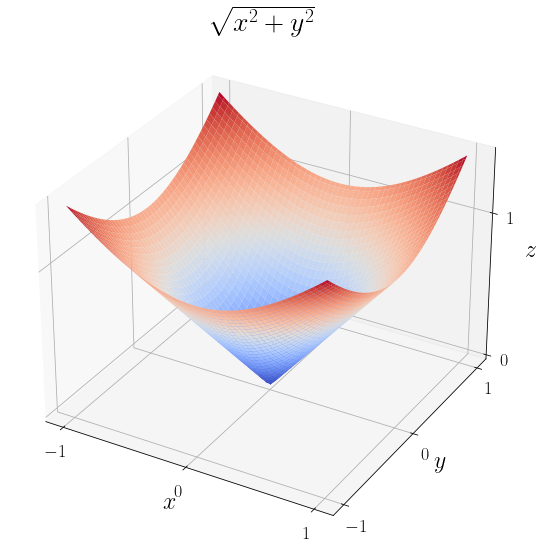

In [47]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt


def h(x):
    return np.sqrt(1 - x**2)

def g(x):
    return -h(x)

def f(x, y):
    return np.sqrt(x**2 + y**2)

a, b = -1, 1
I, _ = integrate.dblquad(f, -1, 1, g, h)

x = np.linspace(a, b, 100)
y = np.linspace(a, b, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig, ax = plt.subplots(figsize=(8, 8), layout="tight", subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap="coolwarm")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([0, 1])
ax.set_title(r"$\sqrt{x^2 + y^2}$")



print(f"Вычисленное значение интеграла: {I}, точное значение: {2*np.pi/3}.")

Трехкратные интегралы вида

$$
\int\limits_a^b \!\! \int\limits_{g(x)}^{h(x)} \!\! \int\limits_{q(x, y)}^{r(x, y)} f(x, y, z) \, dx dy dz.
$$

можно вычислить методом [integrate.tplquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html). Интеграл произвольной кратности можно вычислить методом [integrate.tplquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html).